# Analysis Plots

In [122]:
import pandas
import numpy as np
import re
import random
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

In [146]:
import warnings
warnings.filterwarnings('ignore')

# Before cleaning the data

In [123]:
# Load data

books_filepath = '/Users/naziafarhat/gPro/ScrapyBooks/goodbooks/booksinfo.csv'
users_filepath = '/Users/naziafarhat/gPro/ScrapyBooks/goodbooks/usersinfo.csv'

Rating representation:

did not like it - 1
</br>it was okay - 2
</br>liked it - 3
</br>really liked it - 4
</br>it was amazing - 5

In [124]:
# Load Books DF.

books_df = pandas.read_csv(books_filepath)
books_df

,name,author,booklink,avg_rating,num_ratings
0,ব্যোমকেশ সমগ্র,Sharadindu Bandyopadhyay,/book/show/2426848._,4.59,3054
1,Byomkesh Bakshi Stories,Sharadindu Bandyopadhyay,/book/show/5968988-byomkesh-bakshi-stories,4.27,1182
2,ঐতিহাসিক কাহিনী সমগ্র,Sharadindu Bandyopadhyay,/book/show/12220441,4.52,510
3,সত্যান্বেষী,Sharadindu Bandyopadhyay,/book/show/20746143,4.14,534
4,ঝিন্দের বন্দী,Sharadindu Bandyopadhyay,/book/show/17410164,4.47,437
...,...,...,...,...,...
4989,সতীনাথ ভাদুড়ীর শ্রেষ্ঠ গল্প,Satinath Bhaduri,/book/show/48570936,4.00,1
4990,সতীনাথ রচনাবলী প্রথম খণ্ড,Satinath Bhaduri,/book/show/32376274,4.00,1
4991,সতীনাথ রচনাবলী চতুর্থ খণ্ড,Satinath Bhaduri,/book/show/32383887,2.00,1
4992,সতীনাথ রচনাবলী দ্বিতীয় খণ্ড,Satinath Bhaduri,/book/show/32377880,0.00,0


In [125]:
# Edit the booklink column values. 

goodreads_link = 'https://www.goodreads.com'
books_df['booklink'] = books_df['booklink'].map(lambda x: f'{goodreads_link}{x}', na_action = 'ignore')
books_df

,name,author,booklink,avg_rating,num_ratings
0,ব্যোমকেশ সমগ্র,Sharadindu Bandyopadhyay,https://www.goodreads.com/book/show/2426848._,4.59,3054
1,Byomkesh Bakshi Stories,Sharadindu Bandyopadhyay,https://www.goodreads.com/book/show/5968988-by...,4.27,1182
2,ঐতিহাসিক কাহিনী সমগ্র,Sharadindu Bandyopadhyay,https://www.goodreads.com/book/show/12220441,4.52,510
3,সত্যান্বেষী,Sharadindu Bandyopadhyay,https://www.goodreads.com/book/show/20746143,4.14,534
4,ঝিন্দের বন্দী,Sharadindu Bandyopadhyay,https://www.goodreads.com/book/show/17410164,4.47,437
...,...,...,...,...,...
4989,সতীনাথ ভাদুড়ীর শ্রেষ্ঠ গল্প,Satinath Bhaduri,https://www.goodreads.com/book/show/48570936,4.00,1
4990,সতীনাথ রচনাবলী প্রথম খণ্ড,Satinath Bhaduri,https://www.goodreads.com/book/show/32376274,4.00,1
4991,সতীনাথ রচনাবলী চতুর্থ খণ্ড,Satinath Bhaduri,https://www.goodreads.com/book/show/32383887,2.00,1
4992,সতীনাথ রচনাবলী দ্বিতীয় খণ্ড,Satinath Bhaduri,https://www.goodreads.com/book/show/32377880,0.00,0


In [126]:
# Load Users DF.

users_df = pandas.read_csv(users_filepath)
users_df

,name,author,first-published,user_id,user_rating_date,user_rating
0,Pather Panchali: Song of the Road,Bibhutibhushan Bandyopadhyay,(first published September 11th 1929),87324,"Sep 28, 2007",really liked it
1,Pather Panchali: Song of the Road,Bibhutibhushan Bandyopadhyay,(first published September 11th 1929),94815246,"Jul 17, 2020",really liked it
2,Pather Panchali: Song of the Road,Bibhutibhushan Bandyopadhyay,(first published September 11th 1929),3654176,"Mar 14, 2012",really liked it
3,Pather Panchali: Song of the Road,Bibhutibhushan Bandyopadhyay,(first published September 11th 1929),23621066,"May 20, 2014",it was amazing
4,Pather Panchali: Song of the Road,Bibhutibhushan Bandyopadhyay,(first published September 11th 1929),9100524,"May 04, 2012",it was amazing
...,...,...,...,...,...,...
99442,জোড় বিজোড়,Shirshendu Mukhopadhyay,|,42999317,NaN,NaN
99443,জোড় বিজোড়,Shirshendu Mukhopadhyay,|,110082154,NaN,NaN
99444,জোড় বিজোড়,Shirshendu Mukhopadhyay,|,80047973,NaN,NaN
99445,জোড় বিজোড়,Shirshendu Mukhopadhyay,|,63338378,NaN,NaN


In [127]:
rating_val = {'did not like it': 1, 
              'it was okay': 2, 
              'liked it': 3, 
              'really liked it': 4, 
              'it was amazing': 5}

users_df['user_rating'] = users_df['user_rating'].map(rating_val, na_action = 'ignore')
users_df

,name,author,first-published,user_id,user_rating_date,user_rating
0,Pather Panchali: Song of the Road,Bibhutibhushan Bandyopadhyay,(first published September 11th 1929),87324,"Sep 28, 2007",4.0
1,Pather Panchali: Song of the Road,Bibhutibhushan Bandyopadhyay,(first published September 11th 1929),94815246,"Jul 17, 2020",4.0
2,Pather Panchali: Song of the Road,Bibhutibhushan Bandyopadhyay,(first published September 11th 1929),3654176,"Mar 14, 2012",4.0
3,Pather Panchali: Song of the Road,Bibhutibhushan Bandyopadhyay,(first published September 11th 1929),23621066,"May 20, 2014",5.0
4,Pather Panchali: Song of the Road,Bibhutibhushan Bandyopadhyay,(first published September 11th 1929),9100524,"May 04, 2012",5.0
...,...,...,...,...,...,...
99442,জোড় বিজোড়,Shirshendu Mukhopadhyay,|,42999317,NaN,NaN
99443,জোড় বিজোড়,Shirshendu Mukhopadhyay,|,110082154,NaN,NaN
99444,জোড় বিজোড়,Shirshendu Mukhopadhyay,|,80047973,NaN,NaN
99445,জোড় বিজোড়,Shirshendu Mukhopadhyay,|,63338378,NaN,NaN


### Remove non-bengali books

In [128]:
# Let's take a look at the authors the collected books are written by. 
# Many of the authors are not actually Bengali writer.

books_df['author'].unique()

array(['Sharadindu Bandyopadhyay', 'Bibhutibhushan Bandyopadhyay',
       'Tarashankar Bandyopadhyay', 'Laura Ingalls Wilder',
       'Jahanara Imam', 'Muhammed Zafar Iqbal', 'Sukumar Ray',
       'Buddhadeb Guha', 'Sheikh Mujibur Rahman',
       'বঙ্গবন্ধু শেখ মুজিবুর রহমান', 'Manik Bandopadhyay',
       'Samaresh Majumdar', 'Ashapurna Devi', 'Kazi Nazrul Islam',
       'Shirshendu Mukhopadhyay', 'Satyajit Ray', 'Buddhadeva Bose',
       'Dakshinaranjan Mitra Majumder', 'Omar Khayyám', 'Hafez',
       'Hans Christian Andersen', 'Arunava Sinha', 'Kālidāsa',
       'Partha Sarathi Chattopadhyay', 'Premendra Mitra',
       'Kamal Chowdhury', 'Ryszard Frelek', 'তারাশঙ্কর বন্দোপাধ্যায়',
       'Martin Edwards', 'John Pugmire', 'Sunil Gangopadhyay',
       'হেমেন্দ্র কুমার রায়', 'Harinarayan Chattopadhyay',
       'Asitkumar Bandopadhyay', 'Jibanananda Das',
       'Abanindranath Tagore', 'Leela Majumdar', 'Henri Cartier-Bresson',
       'Alberto Manguel', 'MY SUPPORT', 'Ritwik Ghatak',
 

In [129]:
# Lets now create a list of non-bengali writers.

non_bengali_writers = ['Laura Ingalls Wilder', 'Omar Khayyám', 'Hafez',
       'Hans Christian Andersen', 'Ryszard Frelek', 'Martin Edwards', 'John Pugmire', 'Henri Cartier-Bresson',
       'Alberto Manguel', 'MY SUPPORT', 'W. Somerset Maugham', 'Andrew Robinson',
       'Ray Bradbury', 'Nâzım Hikmet', 'Mala Dayal',
       'Gaston Roberge', 'Enrico Magrelli', 'Ashok Jain',
       'Kath Murdoch', 'Charles Baudelaire', 'Luigi Pirandello', 'editionNEXT.com', 'Alex Mason', 'Hermann Hesse','Jane Austen', 'William Shakespeare',
       'Henry David Thoreau', 'Marcel Proust', 'Various', 'Henry James',
       'Robert Louis Stevenson', 'Virginia Woolf', 'Charles Dickens',
       'A.S. Balakrishnan', 'Munshi Premchand', 'Writing Knights Press',
       'Dušan Zbavitel', 'Patricia Lynch', 'Jim Corbett',
       'Barbara H. Solomon', 'Khushwant Singh', 'Verrier Elwin',
       'Edward James Corbet', 'Ginu Kamani',
       'Meena Alexander', 'Anand', 'William Peter Blatty', 'Negar Akhavi', 'Lao Tzu', 'William Blake', 'Ann VanderMeer', 'Kabir', 'Силвия Йотова',
       'John Carey', 'Edgar Allan Poe', 'James Naughtie', 'Marvin Kaye',
       'Rudyard Kipling', 'Ryūnosuke Akutagawa', 'Jaroslav Pelikan',
       'Sue Bradbury', 'W.B. Yeats', 'Chitra Gajadin',
       'Albert Einstein', 'Lord Byron', 'David    Masterman',
       'M.R. Nelson', 'Aurélio Buarque de Holanda Ferreira', 'Anonymous', 'William Winstanley Pearson',
       'Alberto Moravia', 'Στέφανος Ελμάζης', 'Sean  Murphy',
       'Richard Skelton', 'Ernest Rhys', 'Alexander Pushkin',
       'Harcharan Chawla', 'Golgotha Press', 'Krishna-Dwaipayana Vyasa',
       'Leo Hamalian', 'Yiannis Ritsos', 'Qian Zhongshu',
       'John Steinbeck', 'Hawe Setiawan', 'Ghizela Rowe', 'Oscar Wilde',
       'Sólem Aléchem', 'Patrick Colm Hogan', 'Samuel Carr',
       'Kabir Kabir', 'รพินทรนาถ ฐากูร', 'P.T. Barnum', 'KathaBooks',
       'Margaret B. White', 'Ovid', 'Bjørnstjerne Bjørnson',
       'Ashvin Mehta', 'Nicol Macnicol', 'Sven Lindner',
       'Louisa May Alcott', 'George Calderon', 'Dhumketu',
       'Phoebe Taylor', 'William Rothenstein', 'Kanika Tomar',
       'Sherwood Anderson', 'Upton Sinclair', 'Rabbit & Turtle', 'Merwin Roe',
       'Desmond Kon Zhicheng-Mingdé', 'Guy de Maupassant',
       'U.R. Ananthamurthy', 'Isaac Bashevis Singer',
       'Sarvepalli Radhakrishnan', 'Confucius', 'Prem Chand Lal',
       'Sangeetha Rayapati', 'D.J. Irani', 'Rumi', 'Chaitanya Modak', 'Patrick Geddes',
       'Divaldo Pereira Franco', 'Rose Reinhardt Anthon',
       'Anatole France', 'John Donne', 'Theodore Douglas Dunn',
       'Christian Bernard', 'Emma Laybourn', 'Рабиндранат Тагор', 'Leela Gulati']

In [130]:
# Let's now use the non-bengali writers list to extract the books by Bengali authors

bengali_writers_books_df = books_df.loc[~books_df['author'].isin(non_bengali_writers)]
bengali_writers_books_df

,name,author,booklink,avg_rating,num_ratings
0,ব্যোমকেশ সমগ্র,Sharadindu Bandyopadhyay,https://www.goodreads.com/book/show/2426848._,4.59,3054
1,Byomkesh Bakshi Stories,Sharadindu Bandyopadhyay,https://www.goodreads.com/book/show/5968988-by...,4.27,1182
2,ঐতিহাসিক কাহিনী সমগ্র,Sharadindu Bandyopadhyay,https://www.goodreads.com/book/show/12220441,4.52,510
3,সত্যান্বেষী,Sharadindu Bandyopadhyay,https://www.goodreads.com/book/show/20746143,4.14,534
4,ঝিন্দের বন্দী,Sharadindu Bandyopadhyay,https://www.goodreads.com/book/show/17410164,4.47,437
...,...,...,...,...,...
4989,সতীনাথ ভাদুড়ীর শ্রেষ্ঠ গল্প,Satinath Bhaduri,https://www.goodreads.com/book/show/48570936,4.00,1
4990,সতীনাথ রচনাবলী প্রথম খণ্ড,Satinath Bhaduri,https://www.goodreads.com/book/show/32376274,4.00,1
4991,সতীনাথ রচনাবলী চতুর্থ খণ্ড,Satinath Bhaduri,https://www.goodreads.com/book/show/32383887,2.00,1
4992,সতীনাথ রচনাবলী দ্বিতীয় খণ্ড,Satinath Bhaduri,https://www.goodreads.com/book/show/32377880,0.00,0


In [131]:
# Now we do see only Bengali writers

bengali_writers_books_df['author'].unique()

array(['Sharadindu Bandyopadhyay', 'Bibhutibhushan Bandyopadhyay',
       'Tarashankar Bandyopadhyay', 'Jahanara Imam',
       'Muhammed Zafar Iqbal', 'Sukumar Ray', 'Buddhadeb Guha',
       'Sheikh Mujibur Rahman', 'বঙ্গবন্ধু শেখ মুজিবুর রহমান',
       'Manik Bandopadhyay', 'Samaresh Majumdar', 'Ashapurna Devi',
       'Kazi Nazrul Islam', 'Shirshendu Mukhopadhyay', 'Satyajit Ray',
       'Buddhadeva Bose', 'Dakshinaranjan Mitra Majumder',
       'Arunava Sinha', 'Kālidāsa', 'Partha Sarathi Chattopadhyay',
       'Premendra Mitra', 'Kamal Chowdhury', 'তারাশঙ্কর বন্দোপাধ্যায়',
       'Sunil Gangopadhyay', 'হেমেন্দ্র কুমার রায়',
       'Harinarayan Chattopadhyay', 'Asitkumar Bandopadhyay',
       'Jibanananda Das', 'Abanindranath Tagore', 'Leela Majumdar',
       'Ritwik Ghatak', 'Punyolata Chakraborty', 'Samar Sen', 'Ajeya Roy',
       'Upendrakishore Ray Chowdhury', 'Sandip Ray',
       'Abhijit Chattopadhyay', 'Parimal Mukhopadhyay', 'Bimal Ghosh',
       'Sisirkumar Mazumdar', 'Pa

In [132]:
# Let's repeat the same processing for the users dataframe.

bengali_writers_users_df = users_df.loc[~users_df['author'].isin(non_bengali_writers)]
bengali_writers_users_df

,name,author,first-published,user_id,user_rating_date,user_rating
0,Pather Panchali: Song of the Road,Bibhutibhushan Bandyopadhyay,(first published September 11th 1929),87324,"Sep 28, 2007",4.0
1,Pather Panchali: Song of the Road,Bibhutibhushan Bandyopadhyay,(first published September 11th 1929),94815246,"Jul 17, 2020",4.0
2,Pather Panchali: Song of the Road,Bibhutibhushan Bandyopadhyay,(first published September 11th 1929),3654176,"Mar 14, 2012",4.0
3,Pather Panchali: Song of the Road,Bibhutibhushan Bandyopadhyay,(first published September 11th 1929),23621066,"May 20, 2014",5.0
4,Pather Panchali: Song of the Road,Bibhutibhushan Bandyopadhyay,(first published September 11th 1929),9100524,"May 04, 2012",5.0
...,...,...,...,...,...,...
99442,জোড় বিজোড়,Shirshendu Mukhopadhyay,|,42999317,NaN,NaN
99443,জোড় বিজোড়,Shirshendu Mukhopadhyay,|,110082154,NaN,NaN
99444,জোড় বিজোড়,Shirshendu Mukhopadhyay,|,80047973,NaN,NaN
99445,জোড় বিজোড়,Shirshendu Mukhopadhyay,|,63338378,NaN,NaN


In [133]:
bengali_writers_users_df['author'].unique()

array(['Bibhutibhushan Bandyopadhyay', 'বঙ্গবন্ধু শেখ মুজিবুর রহমান',
       'Tarashankar Bandyopadhyay', 'Satyajit Ray',
       'Shirshendu Mukhopadhyay', 'Dakshinaranjan Mitra Majumder',
       'Buddhadeb Guha', 'Manik Bandopadhyay', 'Samaresh Majumdar',
       'Kazi Nazrul Islam', 'Sharadindu Bandyopadhyay',
       'তারাশঙ্কর বন্দোপাধ্যায়', 'Asitkumar Bandopadhyay',
       'Upendrakishore Ray Chowdhury', 'Abhijit Chattopadhyay',
       'Ajeya Roy', 'Sandip Ray', 'Samar Sen', 'Punyolata Chakraborty',
       'Leela Majumdar', 'Abanindranath Tagore', 'Jibanananda Das',
       'Ritwik Ghatak', 'Sukumar Ray', 'Rajshekhar Basu',
       'Premendra Mitra', 'Manjil Sen', 'বিনোদবিহারী মুখোপাধ্যায়',
       'Parsuram', 'Sisirkumar Mazumdar', 'Bimal Ghosh',
       'Parimal Mukhopadhyay', 'Arunava Sinha',
       'Harinarayan Chattopadhyay', 'হেমেন্দ্র কুমার রায়',
       'Sunil Gangopadhyay', 'Kamal Chowdhury',
       'Partha Sarathi Chattopadhyay', 'Buddhadeva Bose',
       'Sudhindranath Dutt

### Fix different spellings of same author's name

In [135]:
# These authors are repeated in different spellings in the dfs.

multiple_records_authors = [['তারাশঙ্কর বন্দোপাধ্যায়', 'Tarashankar Bandyopadhyay', 'Tarashankar Bandyopadhy'], 
                            ['Sheikh Mujibur Rahman', 'বঙ্গবন্ধু শেখ মুজিবুর রহমান'], 
                            ['Upendrakishore Ray Chowdhury', 'Upendrakisor Ray'], 
                            ['Rajshekhar Basu', 'Parsuram'], 
                            ['Shirshendu Mukhopadhyay', 'Sirshendu Mukhopadhyay']]

In [136]:
# Change the multiple spellings of one author into a single spelling in the df. 
# This will produce some duplicate rows containing same (author, book)?

for author in multiple_records_authors:
    for dframe in [bengali_writers_books_df, bengali_writers_users_df]:
        dframe.loc[dframe["author"].isin(author), "author"] = author[0]

In [138]:
# Unique writers

bengali_writers_books_df['author'].unique()

array(['Sharadindu Bandyopadhyay', 'Bibhutibhushan Bandyopadhyay',
       'তারাশঙ্কর বন্দোপাধ্যায়', 'Jahanara Imam', 'Muhammed Zafar Iqbal',
       'Sukumar Ray', 'Buddhadeb Guha', 'Sheikh Mujibur Rahman',
       'Manik Bandopadhyay', 'Samaresh Majumdar', 'Ashapurna Devi',
       'Kazi Nazrul Islam', 'Shirshendu Mukhopadhyay', 'Satyajit Ray',
       'Buddhadeva Bose', 'Dakshinaranjan Mitra Majumder',
       'Arunava Sinha', 'Kālidāsa', 'Partha Sarathi Chattopadhyay',
       'Premendra Mitra', 'Kamal Chowdhury', 'Sunil Gangopadhyay',
       'হেমেন্দ্র কুমার রায়', 'Harinarayan Chattopadhyay',
       'Asitkumar Bandopadhyay', 'Jibanananda Das',
       'Abanindranath Tagore', 'Leela Majumdar', 'Ritwik Ghatak',
       'Punyolata Chakraborty', 'Samar Sen', 'Ajeya Roy',
       'Upendrakishore Ray Chowdhury', 'Sandip Ray',
       'Abhijit Chattopadhyay', 'Parimal Mukhopadhyay', 'Bimal Ghosh',
       'Sisirkumar Mazumdar', 'Rajshekhar Basu',
       'বিনোদবিহারী মুখোপাধ্যায়', 'Manjil Sen', 'K

In [137]:
# Number of unique writers

bengali_writers_books_df['author'].unique().shape

(79,)

### Comparison of number of books and number of users per author

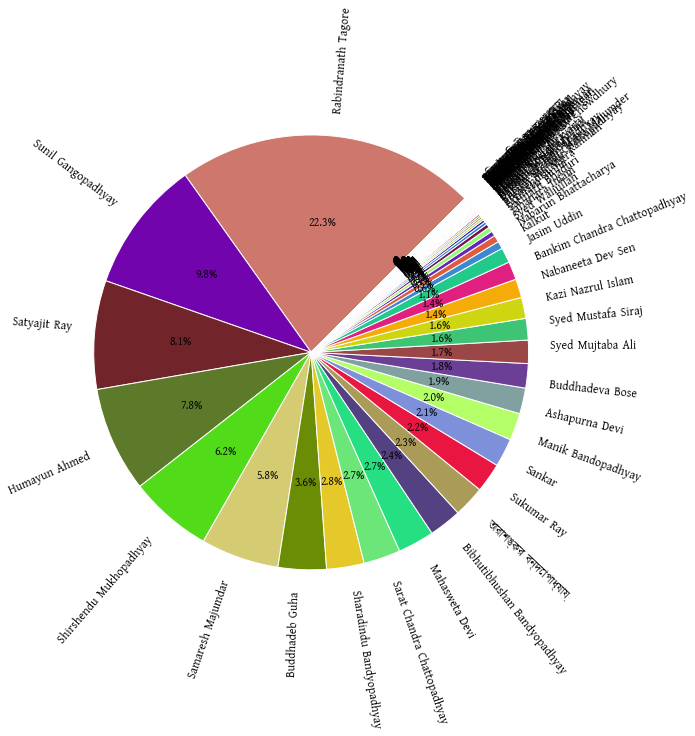

In [144]:
# Pie chart of number of books per author.

plt.figure(figsize = (15, 10))
n_books_per_author = dict(bengali_writers_books_df['author'].value_counts())
labels = list(n_books_per_author.keys())
sizes = list(n_books_per_author.values())
prop = fm.FontProperties(fname='kalpurush.ttf')
prop.set_size('large')
colors = [[random.random() for _ in range(3)] for _ in range(len(sizes))]
patches, texts, autotexts = plt.pie(sizes, labels=labels, autopct='%1.1f%%', rotatelabels =True, 
                                    shadow=False, startangle=45, 
                                    wedgeprops = { 'linewidth' : 1, 'edgecolor' : 'white' }, colors=colors)
plt.setp(texts, fontproperties = prop)
plt.setp(autotexts, fontproperties = prop);

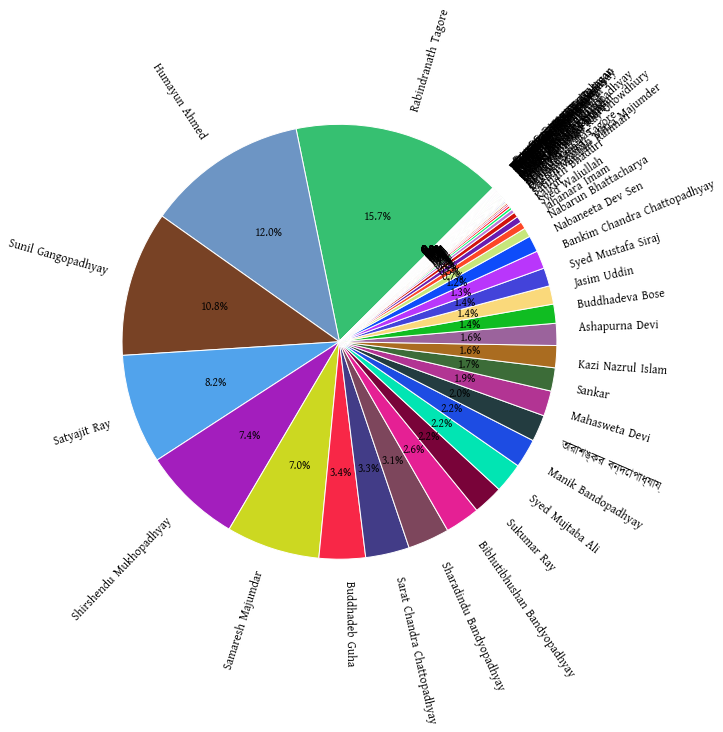

In [145]:
# Pie chart of number of users (who read or rated) per authors.

plt.figure(figsize = (15, 10))
n_users_per_author = dict(bengali_writers_users_df['author'].value_counts())
labels = list(n_users_per_author.keys())
sizes = list(n_users_per_author.values())
prop = fm.FontProperties(fname='kalpurush.ttf')
prop.set_size('large')
colors = [[random.random() for _ in range(3)] for _ in range(len(sizes))]
patches, texts, autotexts = plt.pie(sizes, labels=labels, autopct='%1.1f%%', rotatelabels =True, 
                                    shadow=False, startangle=45, 
                                    wedgeprops = { 'linewidth' : 1, 'edgecolor' : 'white' }, colors=colors)
plt.setp(texts, fontproperties = prop)
plt.setp(autotexts, fontproperties = prop);

# After cleaning the data

### Merged Books-Users-info DF summary plots

In [3]:
# Load data

booksusersinfo_path = '/Users/naziafarhat/gPro/ScrapyBooks/booksusersinfo.csv'

### Books per author

In [4]:
# Keep single entry of each book written by an author.

bengali_books_users_info_df = pandas.read_csv(booksusersinfo_path).drop_duplicates(['name_x', 'author_x'])
bengali_books_users_info_df

,Unnamed: 0,name_x,author_x,booklink,avg_rating,num_ratings,name_y,author_y,first-published,user_id,user_rating_date,user_rating
0,0,ব্যোমকেশ সমগ্র,Sharadindu Bandyopadhyay,https://www.goodreads.com/book/show/2426848._,4.59,3054,ব্যোমকেশ সমগ্র,Sharadindu Bandyopadhyay,(ISBN13:,4547588,"Sep 07, 2011",5.0
30,30,Byomkesh Bakshi Stories,Sharadindu Bandyopadhyay,https://www.goodreads.com/book/show/5968988-by...,4.27,1182,Byomkesh Bakshi Stories,Sharadindu Bandyopadhyay,(ISBN13:,4298297,"Oct 19, 2011",3.0
60,60,ঐতিহাসিক কাহিনী সমগ্র,Sharadindu Bandyopadhyay,https://www.goodreads.com/book/show/12220441,4.52,510,ঐতিহাসিক কাহিনী সমগ্র,Sharadindu Bandyopadhyay,(ISBN13:,12102940,"Jun 18, 2017",3.0
90,90,সত্যান্বেষী,Sharadindu Bandyopadhyay,https://www.goodreads.com/book/show/20746143,4.14,534,সত্যান্বেষী,Sharadindu Bandyopadhyay,|,73221135,"Apr 27, 2019",4.0
120,120,ঝিন্দের বন্দী,Sharadindu Bandyopadhyay,https://www.goodreads.com/book/show/17410164,4.47,437,ঝিন্দের বন্দী,Sharadindu Bandyopadhyay,(ISBN13:,73221135,"Jul 18, 2019",5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
108204,108204,"মিশর রহস্য (কাকাবাবু, #5)",Sunil Gangopadhyay,https://www.goodreads.com/book/show/17368221,3.95,554,মিশর রহস্য (বাংলা কমিকস্),Sunil Gangopadhyay,|,21103924,"Jan 31, 2019",3.0
108239,108239,মিশর রহস্য,Sunil Gangopadhyay,https://www.goodreads.com/book/show/32606421,3.69,13,মিশর রহস্য (বাংলা কমিকস্),Sunil Gangopadhyay,|,21103924,"Jan 31, 2019",3.0
108274,108274,নির্বাচিত উপন্যাস,Sunil Gangopadhyay,https://www.goodreads.com/book/show/55516951,5.00,1,নির্বাচিত উপন্যাস (দ্বিতীয় খণ্ড),Sunil Gangopadhyay,(ISBN13:,71738555,NaN,5.0
108278,108278,The Complete Works of Rabindranath Tagore,Rabindranath Tagore,https://www.goodreads.com/book/show/34385646-t...,4.26,47,The Complete Works of Rabindranath Tagore (Dig...,Rabindranath Tagore,|,49554055,NaN,NaN


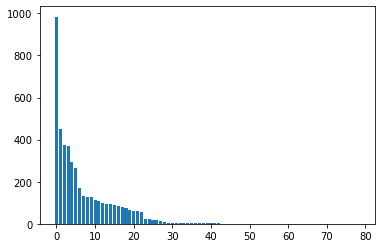

In [5]:
# The number of times an author appears in the books df. An author has more than 1000 mentions/books in the df.
# x-axis shows the number of unique authors and y-axis shows the number of times each author appears in the df.

plt.bar(range(len(list(bengali_books_users_info_df['author_x'].value_counts()))), list(bengali_books_users_info_df['author_x'].value_counts()));

In [6]:
# Find the 70% quantile. 70% of the authors have no more than this (threshold) number of books in the df.

authors_thresh_70pct = np.quantile(bengali_books_users_info_df['author_x'].value_counts(), .7) 

# Number of books per author in dict form.

n_books_per_author = dict(bengali_books_users_info_df['author_x'].value_counts())

# Authors consisting the 70% (in terms of number of books) - below threshold.

below_70pct_authors_books = {a: c for a, c in n_books_per_author.items() if c <= authors_thresh_70pct}

# Authors in the remaining 30% - above threshold.

above_70pct_authors_books = {a: c for a, c in n_books_per_author.items() if c > authors_thresh_70pct}

In [7]:
# These 30% authors have more books compared to the other 70% in the df.

above_70pct_authors_books

{'Rabindranath Tagore': 984,
 'Sunil Gangopadhyay': 451,
 'Satyajit Ray': 375,
 'Humayun Ahmed': 372,
 'Shirshendu Mukhopadhyay': 292,
 'Samaresh Majumdar': 263,
 'Buddhadeb Guha': 171,
 'Sharadindu Bandyopadhyay': 130,
 'Sarat Chandra Chattopadhyay': 129,
 'Mahasweta Devi': 125,
 'Bibhutibhushan Bandyopadhyay': 111,
 'তারাশঙ্কর বন্দোপাধ্যায়': 107,
 'Sukumar Ray': 97,
 'Manik Bandopadhyay': 96,
 'Sankar': 93,
 'Ashapurna Devi': 91,
 'Buddhadeva Bose': 85,
 'Syed Mujtaba Ali': 78,
 'Syed Mustafa Siraj': 74,
 'Kazi Nazrul Islam': 64,
 'Nabaneeta Dev Sen': 63,
 'Bankim Chandra Chattopadhyay': 63,
 'Jasim Uddin': 54}

In [8]:
# These 70% authors have less books compared to the other 30% in the df.

below_70pct_authors_books

{'Kalkut': 25,
 'Nabarun Bhattacharya': 25,
 'Jahanara Imam': 17,
 'Syed Waliullah': 17,
 'Satinath Bhaduri': 14,
 'Sheikh Mujibur Rahman': 7,
 'Dakshinaranjan Mitra Majumder': 6,
 'Debrani Mitra': 4,
 'হেমেন্দ্র কুমার রায়': 3,
 'Upendrakishore Ray Chowdhury': 3,
 'Jibanananda Das': 3,
 'নীললোহিত': 3,
 'Arunava Sinha': 3,
 'Sudhindranath Dutta': 2,
 'Premendra Mitra': 2,
 'Abanindranath Tagore': 2,
 'Kālidāsa': 2,
 'Leela Majumdar': 2,
 'Rajshekhar Basu': 2,
 'Abhijit Chattopadhyay': 2,
 'Swami Vivekananda': 1,
 'Ishwar Chandra Vidyasagar': 1,
 'গৌরকিশোর ঘোষ': 1,
 'Kautilya': 1,
 'Mohammed Anisur Rahman': 1,
 'Muhammed Zafar Iqbal': 1,
 'Amitav Ghosh': 1,
 'Sri Aurobindo': 1,
 'Bijan Karmakar': 1,
 'Hasan Khurshid Rumi': 1,
 'Anisuzzaman Kajol': 1,
 'Smaranjit Chakraborty': 1,
 'Sister Nivedita': 1,
 'Kamal Kumar Majumdar': 1,
 'Shamsur Rahman': 1,
 'Ritwik Ghatak': 1,
 'Partha Sarathi Chattopadhyay': 1,
 'Kamal Chowdhury': 1,
 'Samar Sen': 1,
 'Ajeya Roy': 1,
 'Sandip Ray': 1,
 'Pari

In [9]:
# Put the below-threshold authors collectively in a separate 'Others' category in the dict.

above_70pct_authors_books['Others'] = sum(below_70pct_authors_books.values())

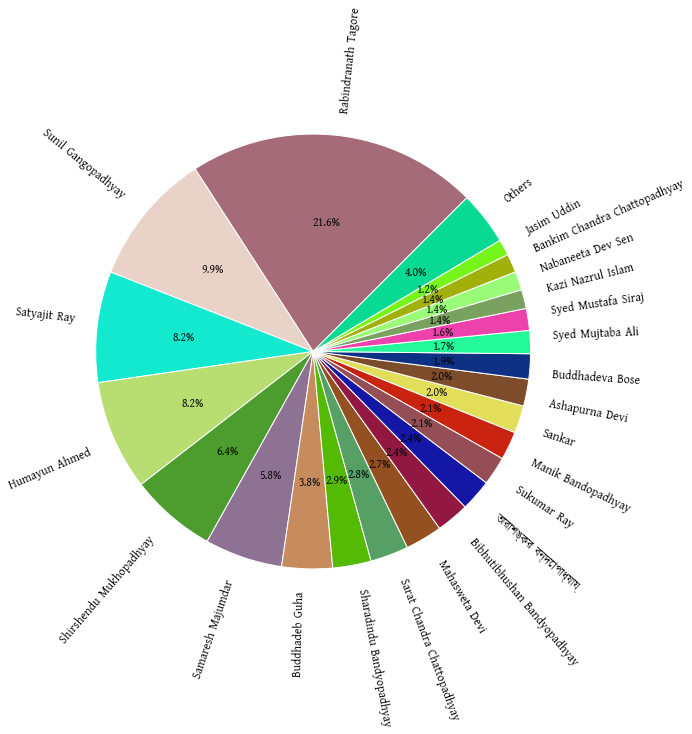

In [135]:
# Draw a pie-plot to show authors distribution. 'Others' collectively has only 3.9% of the books.

plt.figure(figsize = (15, 10))
labels = list(above_70pct_authors_books.keys())
sizes = list(above_70pct_authors_books.values())
prop = fm.FontProperties(fname='kalpurush.ttf')
prop.set_size('large')
colors = [[random.random() for _ in range(3)] for _ in range(len(sizes))]
patches, texts, autotexts = plt.pie(sizes, labels=labels, autopct='%1.1f%%', rotatelabels =True, 
                                    shadow=False, startangle=45, 
                                    wedgeprops = { 'linewidth' : 1, 'edgecolor' : 'white' }, colors=colors)
plt.setp(texts, fontproperties = prop)
plt.setp(autotexts, fontproperties = prop);

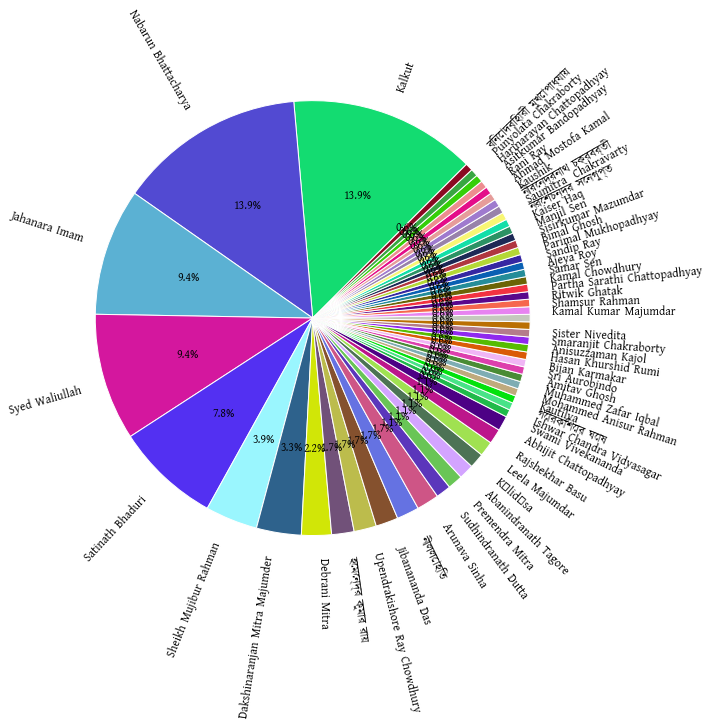

In [136]:
# Pie-plot distribution of authors in the 'Others' category. Too many small pie pieces containing only few books.

plt.figure(figsize = (15, 10))
labels = list(below_70pct_authors_books.keys())
sizes = list(below_70pct_authors_books.values())
prop = fm.FontProperties(fname='kalpurush.ttf')
prop.set_size('large')
colors = [[random.random() for _ in range(3)] for _ in range(len(sizes))]
patches, texts, autotexts = plt.pie(sizes, labels=labels, autopct='%1.1f%%', rotatelabels =True, 
                                    shadow=False, startangle=45, 
                                    wedgeprops = { 'linewidth' : 1, 'edgecolor' : 'white' }, colors=colors)
plt.setp(texts, fontproperties = prop)
plt.setp(autotexts, fontproperties = prop);

In [36]:
# From 'Others' authors find the 80% threshold of books (which is 56% threshold in all-authors distribution)

authors_thresh_56pct = np.quantile(list(below_70pct_authors_books.values()), .8)

# Authors consisting the 56% in the all-authors distribution.

below_56pct_authors_books = {a: c for a, c in n_books_per_author.items() if c <= authors_thresh_56pct}

# Authors in the 56%-70% range.

between_56and70pct_authors_books = {a: c for a, c in n_books_per_author.items() if c > authors_thresh_56pct and c <= authors_thresh_70pct}

In [37]:
# 56% of the authors have only 1-3 books in the df.

authors_thresh_56pct

3.0

In [38]:
# Put 56% authors in the 'Others' category in the 56%-70% authors distribution.

between_56and70pct_authors_books['Others'] = sum(below_56pct_authors_books.values())

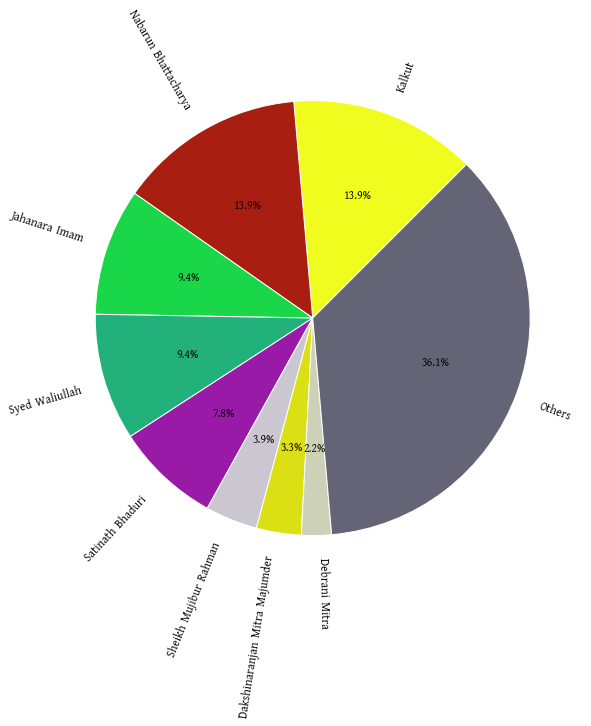

In [158]:
# Pie-plot of authors between 56% and 70%.

plt.figure(figsize = (15, 10))
labels = list(between_56and70pct_authors_books.keys())
sizes = list(between_56and70pct_authors_books.values())
prop = fm.FontProperties(fname='kalpurush.ttf')
prop.set_size('large')
colors = [[random.random() for _ in range(3)] for _ in range(len(sizes))]
patches, texts, autotexts = plt.pie(sizes, labels=labels, autopct='%1.1f%%', rotatelabels =True, 
                                    shadow=False, startangle=45, 
                                    wedgeprops = { 'linewidth' : 1, 'edgecolor' : 'white' }, colors=colors)
plt.setp(texts, fontproperties = prop)
plt.setp(autotexts, fontproperties = prop);

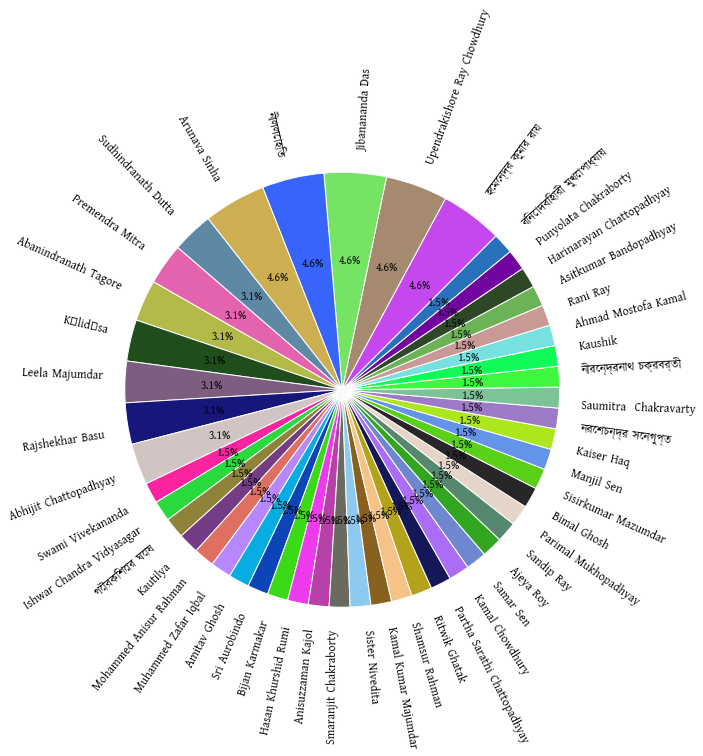

In [159]:
# Pie-plot of authors appearing in the lower 56%, each having 1-3 books in the df.

plt.figure(figsize = (15, 10))
labels =list(below_56pct_authors_books.keys())
sizes = list(below_56pct_authors_books.values())
prop = fm.FontProperties(fname='kalpurush.ttf')
prop.set_size('large')
colors = [[random.random() for _ in range(3)] for _ in range(len(sizes))]
patches, texts, autotexts = plt.pie(sizes, labels=labels, autopct='%1.1f%%', rotatelabels =True, 
                                    shadow=False, startangle=45, 
                                    wedgeprops = { 'linewidth' : 1, 'edgecolor' : 'white' }, colors=colors)
plt.setp(texts, fontproperties = prop)
plt.setp(autotexts, fontproperties = prop);

In [41]:
# Authors in the 56%-70% range.

between_56and70pct_authors_books

{'Kalkut': 25,
 'Nabarun Bhattacharya': 25,
 'Jahanara Imam': 17,
 'Syed Waliullah': 17,
 'Satinath Bhaduri': 14,
 'Sheikh Mujibur Rahman': 7,
 'Dakshinaranjan Mitra Majumder': 6,
 'Debrani Mitra': 4,
 'Others': 65}

In [42]:
below_56pct_authors_books

{'হেমেন্দ্র কুমার রায়': 3,
 'Upendrakishore Ray Chowdhury': 3,
 'Jibanananda Das': 3,
 'নীললোহিত': 3,
 'Arunava Sinha': 3,
 'Sudhindranath Dutta': 2,
 'Premendra Mitra': 2,
 'Abanindranath Tagore': 2,
 'Kālidāsa': 2,
 'Leela Majumdar': 2,
 'Rajshekhar Basu': 2,
 'Abhijit Chattopadhyay': 2,
 'Swami Vivekananda': 1,
 'Ishwar Chandra Vidyasagar': 1,
 'গৌরকিশোর ঘোষ': 1,
 'Kautilya': 1,
 'Mohammed Anisur Rahman': 1,
 'Muhammed Zafar Iqbal': 1,
 'Amitav Ghosh': 1,
 'Sri Aurobindo': 1,
 'Bijan Karmakar': 1,
 'Hasan Khurshid Rumi': 1,
 'Anisuzzaman Kajol': 1,
 'Smaranjit Chakraborty': 1,
 'Sister Nivedita': 1,
 'Kamal Kumar Majumdar': 1,
 'Shamsur Rahman': 1,
 'Ritwik Ghatak': 1,
 'Partha Sarathi Chattopadhyay': 1,
 'Kamal Chowdhury': 1,
 'Samar Sen': 1,
 'Ajeya Roy': 1,
 'Sandip Ray': 1,
 'Parimal Mukhopadhyay': 1,
 'Bimal Ghosh': 1,
 'Sisirkumar Mazumdar': 1,
 'Manjil Sen': 1,
 'Kaiser Haq': 1,
 'নরেশচন্দ্র সেনগুপ্ত': 1,
 'Saumitra  Chakravarty': 1,
 'নীরেন্দ্রনাথ চক্রবর্তী': 1,
 'Kaushik':

### Users' rating per author

In [50]:
# Load the data again

bengali_books_authors_users_info_df = pandas.read_csv(booksusersinfo_path)
bengali_books_authors_users_info_df

,Unnamed: 0,name_x,author_x,booklink,avg_rating,num_ratings,name_y,author_y,first-published,user_id,user_rating_date,user_rating
0,0,ব্যোমকেশ সমগ্র,Sharadindu Bandyopadhyay,https://www.goodreads.com/book/show/2426848._,4.59,3054,ব্যোমকেশ সমগ্র,Sharadindu Bandyopadhyay,(ISBN13:,4547588,"Sep 07, 2011",5.0
1,1,ব্যোমকেশ সমগ্র,Sharadindu Bandyopadhyay,https://www.goodreads.com/book/show/2426848._,4.59,3054,ব্যোমকেশ সমগ্র,Sharadindu Bandyopadhyay,(ISBN13:,89770717,"Nov 25, 2018",5.0
2,2,ব্যোমকেশ সমগ্র,Sharadindu Bandyopadhyay,https://www.goodreads.com/book/show/2426848._,4.59,3054,ব্যোমকেশ সমগ্র,Sharadindu Bandyopadhyay,(ISBN13:,45235331,"Jun 07, 2017",5.0
3,3,ব্যোমকেশ সমগ্র,Sharadindu Bandyopadhyay,https://www.goodreads.com/book/show/2426848._,4.59,3054,ব্যোমকেশ সমগ্র,Sharadindu Bandyopadhyay,(ISBN13:,9189198,"Jul 05, 2013",5.0
4,4,ব্যোমকেশ সমগ্র,Sharadindu Bandyopadhyay,https://www.goodreads.com/book/show/2426848._,4.59,3054,ব্যোমকেশ সমগ্র,Sharadindu Bandyopadhyay,(ISBN13:,32872116,"Nov 27, 2016",5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
108279,108279,The Complete Works of Rabindranath Tagore,Rabindranath Tagore,https://www.goodreads.com/book/show/34385646-t...,4.26,47,The Complete Works of Rabindranath Tagore (Dig...,Rabindranath Tagore,|,7320460,NaN,NaN
108280,108280,The Complete Works of Rabindranath Tagore,Rabindranath Tagore,https://www.goodreads.com/book/show/34385646-t...,4.26,47,The Complete Works of Rabindranath Tagore (Dig...,Rabindranath Tagore,|,93246044,NaN,NaN
108281,108281,The Complete Works of Rabindranath Tagore (Dig...,Rabindranath Tagore,https://www.goodreads.com/book/show/59076387-t...,0.00,0,The Complete Works of Rabindranath Tagore (Dig...,Rabindranath Tagore,|,49554055,NaN,NaN
108282,108282,The Complete Works of Rabindranath Tagore (Dig...,Rabindranath Tagore,https://www.goodreads.com/book/show/59076387-t...,0.00,0,The Complete Works of Rabindranath Tagore (Dig...,Rabindranath Tagore,|,7320460,NaN,NaN


In [52]:
# Find the 70% quantile. 70% of the authors have no more than this (threshold) number of user ratings in the df.

authors_users_thresh_70pct = np.quantile(bengali_books_authors_users_info_df['author_x'].value_counts(), .7) 

# Number of users per author in dict form.

n_users_per_author = dict(bengali_books_authors_users_info_df['author_x'].value_counts())

# Authors consisting the 70% (in terms of number of users) - below threshold.

below_70pct_authors_users = {a: c for a, c in n_users_per_author.items() if c <= authors_users_thresh_70pct}

# Authors in the remaining 30% - above threshold.

above_70pct_authors_users = {a: c for a, c in n_users_per_author.items() if c > authors_users_thresh_70pct}

In [53]:
# Put the below-threshold authors collectively in a separate 'Others' category in the dict.

above_70pct_authors_users['Others'] = sum(below_70pct_authors_users.values())

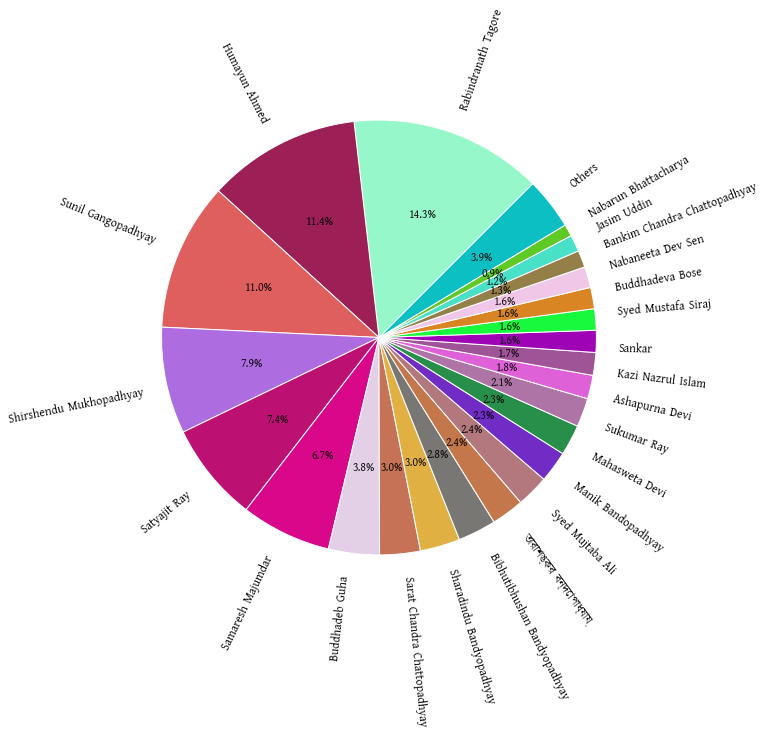

In [121]:
# Pie chart of number of users (who read or rated) per authors.

plt.figure(figsize = (15, 10))
n_users_per_author = dict(bengali_books_authors_users_info_df['author_x'].value_counts())
labels = list(above_70pct_authors_users.keys())
sizes = list(above_70pct_authors_users.values())
prop = fm.FontProperties(fname='kalpurush.ttf')
prop.set_size('large')
colors = [[random.random() for _ in range(3)] for _ in range(len(sizes))]
patches, texts, autotexts = plt.pie(sizes, labels=labels, autopct='%1.1f%%', rotatelabels =True, 
                                    shadow=False, startangle=45, 
                                    wedgeprops = { 'linewidth' : 1, 'edgecolor' : 'white' }, colors=colors)
plt.setp(texts, fontproperties = prop)
plt.setp(autotexts, fontproperties = prop);

# References & Acknowledgements:

1. https://stackoverflow.com/questions/1915871/matplotlib-controlling-pie-chart-font-color-line-width
2. https://stackoverflow.com/questions/43314849/showing-unicode-characters-like-করে-in-matplotlib/43504547
3. https://medium.com/analytics-vidhya/bengali-text-visualization-using-word2vec-211e2ed9fa30
4. https://www.codespeedy.com/create-pie-chart-with-random-colours-in-python/
5. https://stackoverflow.com/questions/28999287/generate-random-colors-rgb